# Importing necessary dependences

In [132]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import pickle

# Loading the data

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.shape

(569, 32)

In [6]:
# finding unique target values
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

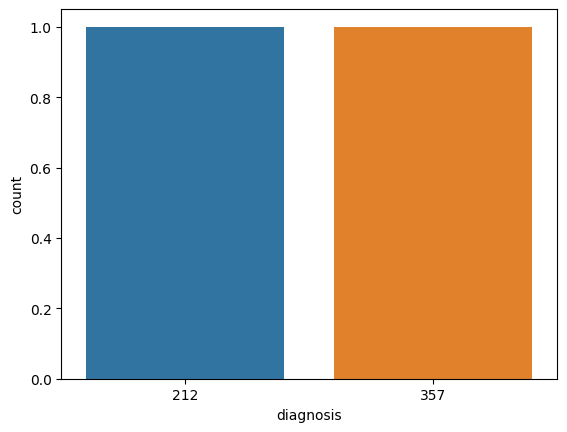

In [7]:
# finding theh value count to check weather the data is balanced or not
sb.countplot(x=df.diagnosis.value_counts())

In [8]:
# Splitting into features and target

In [9]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [10]:
X.shape

(569, 31)

In [11]:
y.shape

(569,)

In [12]:
X.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Train test split of the model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2.883829e+07,14.112499,19.152879,91.818286,653.819121,0.096413,0.103319,0.087485,0.048690,0.180939,...,16.256097,25.538747,107.031407,881.189890,0.132459,0.251862,0.267491,0.114448,0.290416,0.083491
std,1.199562e+08,3.535375,4.158963,24.313012,358.166179,0.013799,0.050490,0.077802,0.038597,0.027398,...,4.890553,6.100631,33.869187,586.395654,0.022626,0.153109,0.199638,0.065321,0.062992,0.017814
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.684525e+05,11.685000,16.070000,75.100000,418.500000,0.086650,0.066160,0.029950,0.020720,0.161850,...,13.020000,21.005000,84.135000,514.650000,0.116400,0.147750,0.116550,0.064955,0.249400,0.071365
50%,9.055020e+05,13.280000,18.750000,85.980000,541.800000,0.095940,0.092280,0.060150,0.033410,0.179200,...,14.850000,25.210000,97.110000,675.200000,0.131600,0.211800,0.228200,0.098610,0.281500,0.079610
75%,8.812329e+06,15.720000,21.590000,103.650000,761.500000,0.105400,0.129300,0.124600,0.074095,0.195500,...,18.410000,29.335000,124.200000,1032.500000,0.145250,0.335000,0.378150,0.160800,0.319000,0.091620
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


In [16]:
# Standardization of the model

In [17]:
scaled = StandardScaler()

In [18]:
X_train_scaled = scaled.fit_transform(X_train)

In [19]:
X_test_scaled = scaled.transform(X_test)

In [111]:
pickle.dump(scaled,open('Scaled_model','wb'))

# Model selection

In [20]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [21]:
# creating a list of various mdels

In [22]:
models = [lr,knn,dt,rf,ada]

In [23]:
model_dict = {0:'Linear Regression',1:'KNN',2:'Decision Tree',3:'Random Forest',4:'Ada boost classifier'}

In [35]:
def best_model(xtr,xt,ytr,yt):
    dict = {}
    for i,model in enumerate(models):
        model.fit(xtr,ytr)
        y_pred = model.predict(xt)
        dict[model_dict[i]] = (f'{round(accuracy_score(yt,y_pred),2)*100}%')
    
    accuracy_df = pd.Series(dict) 
    return accuracy_df.sort_index()

    

In [36]:
best_model(X_train,X_test,y_train,y_test)   #without standardization

Ada boost classifier    98.0%
Decision Tree           90.0%
KNN                     74.0%
Linear Regression       59.0%
Random Forest           97.0%
dtype: object

In [37]:
best_model(X_train_scaled,X_test_scaled,y_train,y_test)   #with standardization

Ada boost classifier    98.0%
Decision Tree           90.0%
KNN                     96.0%
Linear Regression       96.0%
Random Forest           97.0%
dtype: object

In [30]:
# model accuracy using cross val score

In [38]:
# cross_val_sc

In [47]:
def cv_score(xtr,ytr):
    c_mean = {}
    for i,model in enumerate(models):
        c_score = cross_val_score(model,xtr,ytr,cv=5)
        c_mean[model_dict[i]] = (f'{round(c_score.mean()*100,2)}%')
        cross_val_sc = pd.Series(c_mean)
    return cross_val_sc
        

In [48]:
cv_score(X_train_scaled,y_train)

Linear Regression       97.58%
KNN                     96.26%
Decision Tree           91.43%
Random Forest            95.6%
Ada boost classifier    96.04%
dtype: object

In [75]:
 c=[]
for model in models:
   
    c_score = cross_val_score(model,X_train_scaled,y_train,cv=5)
    c.append(c_score.mean())
    

In [76]:
c

[0.9758241758241759,
 0.9626373626373625,
 0.9120879120879121,
 0.9538461538461538,
 0.9604395604395604]

In [77]:
c = [round(x,2) for x in c]

In [78]:
c

[0.98, 0.96, 0.91, 0.95, 0.96]

<BarContainer object of 5 artists>

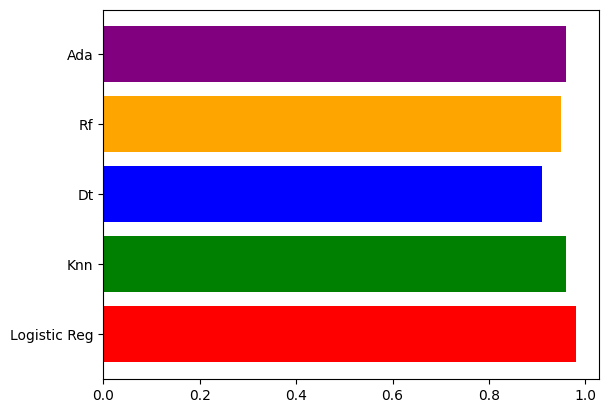

In [96]:
import matplotlib.pyplot as plt
plt.barh(y=['Logistic Reg','Knn','Dt','Rf','Ada'],color=["red", "green", "blue", "orange", "purple"],width=c)

In [206]:
rf

RandomForestClassifier()

# Hyper parameter tuning of the best model

In [99]:
best_model = lr
params = {'C' : [100, 10, 1.0, 0.1, 0.01]}    
   

In [101]:
import warnings
warnings.filterwarnings('ignore')
score = []
rs = RandomizedSearchCV(model,params,cv=5)
rs.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01]})

In [102]:
rs.best_params_

{'C': 0.1}

In [112]:
rs.best_score_

0.9780219780219781

In [115]:
lr = LogisticRegression(C=0.1)

In [116]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1)

In [128]:
pickle.dump(lr,open('Logistic_red','wb'))

# Model evaluation

In [117]:
y_pred = lr.predict(X_test_scaled)

In [119]:
acc_score = accuracy_score(y_test,y_pred)

In [123]:
f'{round(acc_score,3)*100} % '

'96.5 % '

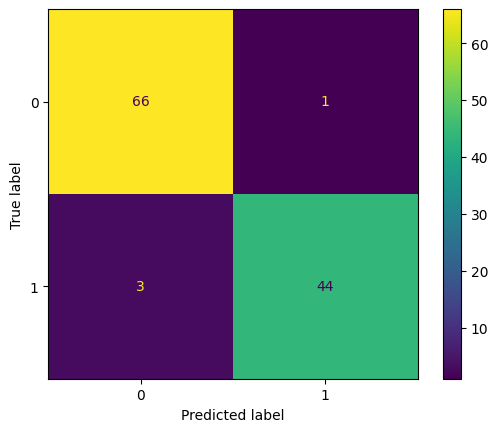

In [127]:
cf = confusion_matrix(y_test,y_pred)
cd = ConfusionMatrixDisplay(cf)
cd.plot()
